# Attribute Information:

Car Name – Name of the car

Cyl – No of cylinders in the car – Multivalued discrete

Disp – Displacement – continuous

Hp – Horsepower – continuous

Wt – Weight – continuous

Acc – Accleration – continuous

Yr – Model of the car – Multivalued discrete

Steps to follow:

EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points
Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points
Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)
Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [1]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
df = pd.read_csv('cars-dataset.csv')
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [5]:
df['cyl'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [10]:
df_numeric = df.select_dtypes([np.number])
df_numeric

,cyl,disp,wt,acc,yr,mpg
0,8,307.0,3504,12.0,70,18.0
1,8,350.0,3693,11.5,70,15.0
2,8,318.0,3436,11.0,70,18.0
3,8,304.0,3433,12.0,70,16.0
4,8,302.0,3449,10.5,70,17.0
5,8,429.0,4341,10.0,70,15.0
6,8,454.0,4354,9.0,70,14.0
7,8,440.0,4312,8.5,70,14.0
8,8,455.0,4425,10.0,70,14.0
9,8,390.0,3850,8.5,70,15.0


C:\Users\vamshidhar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


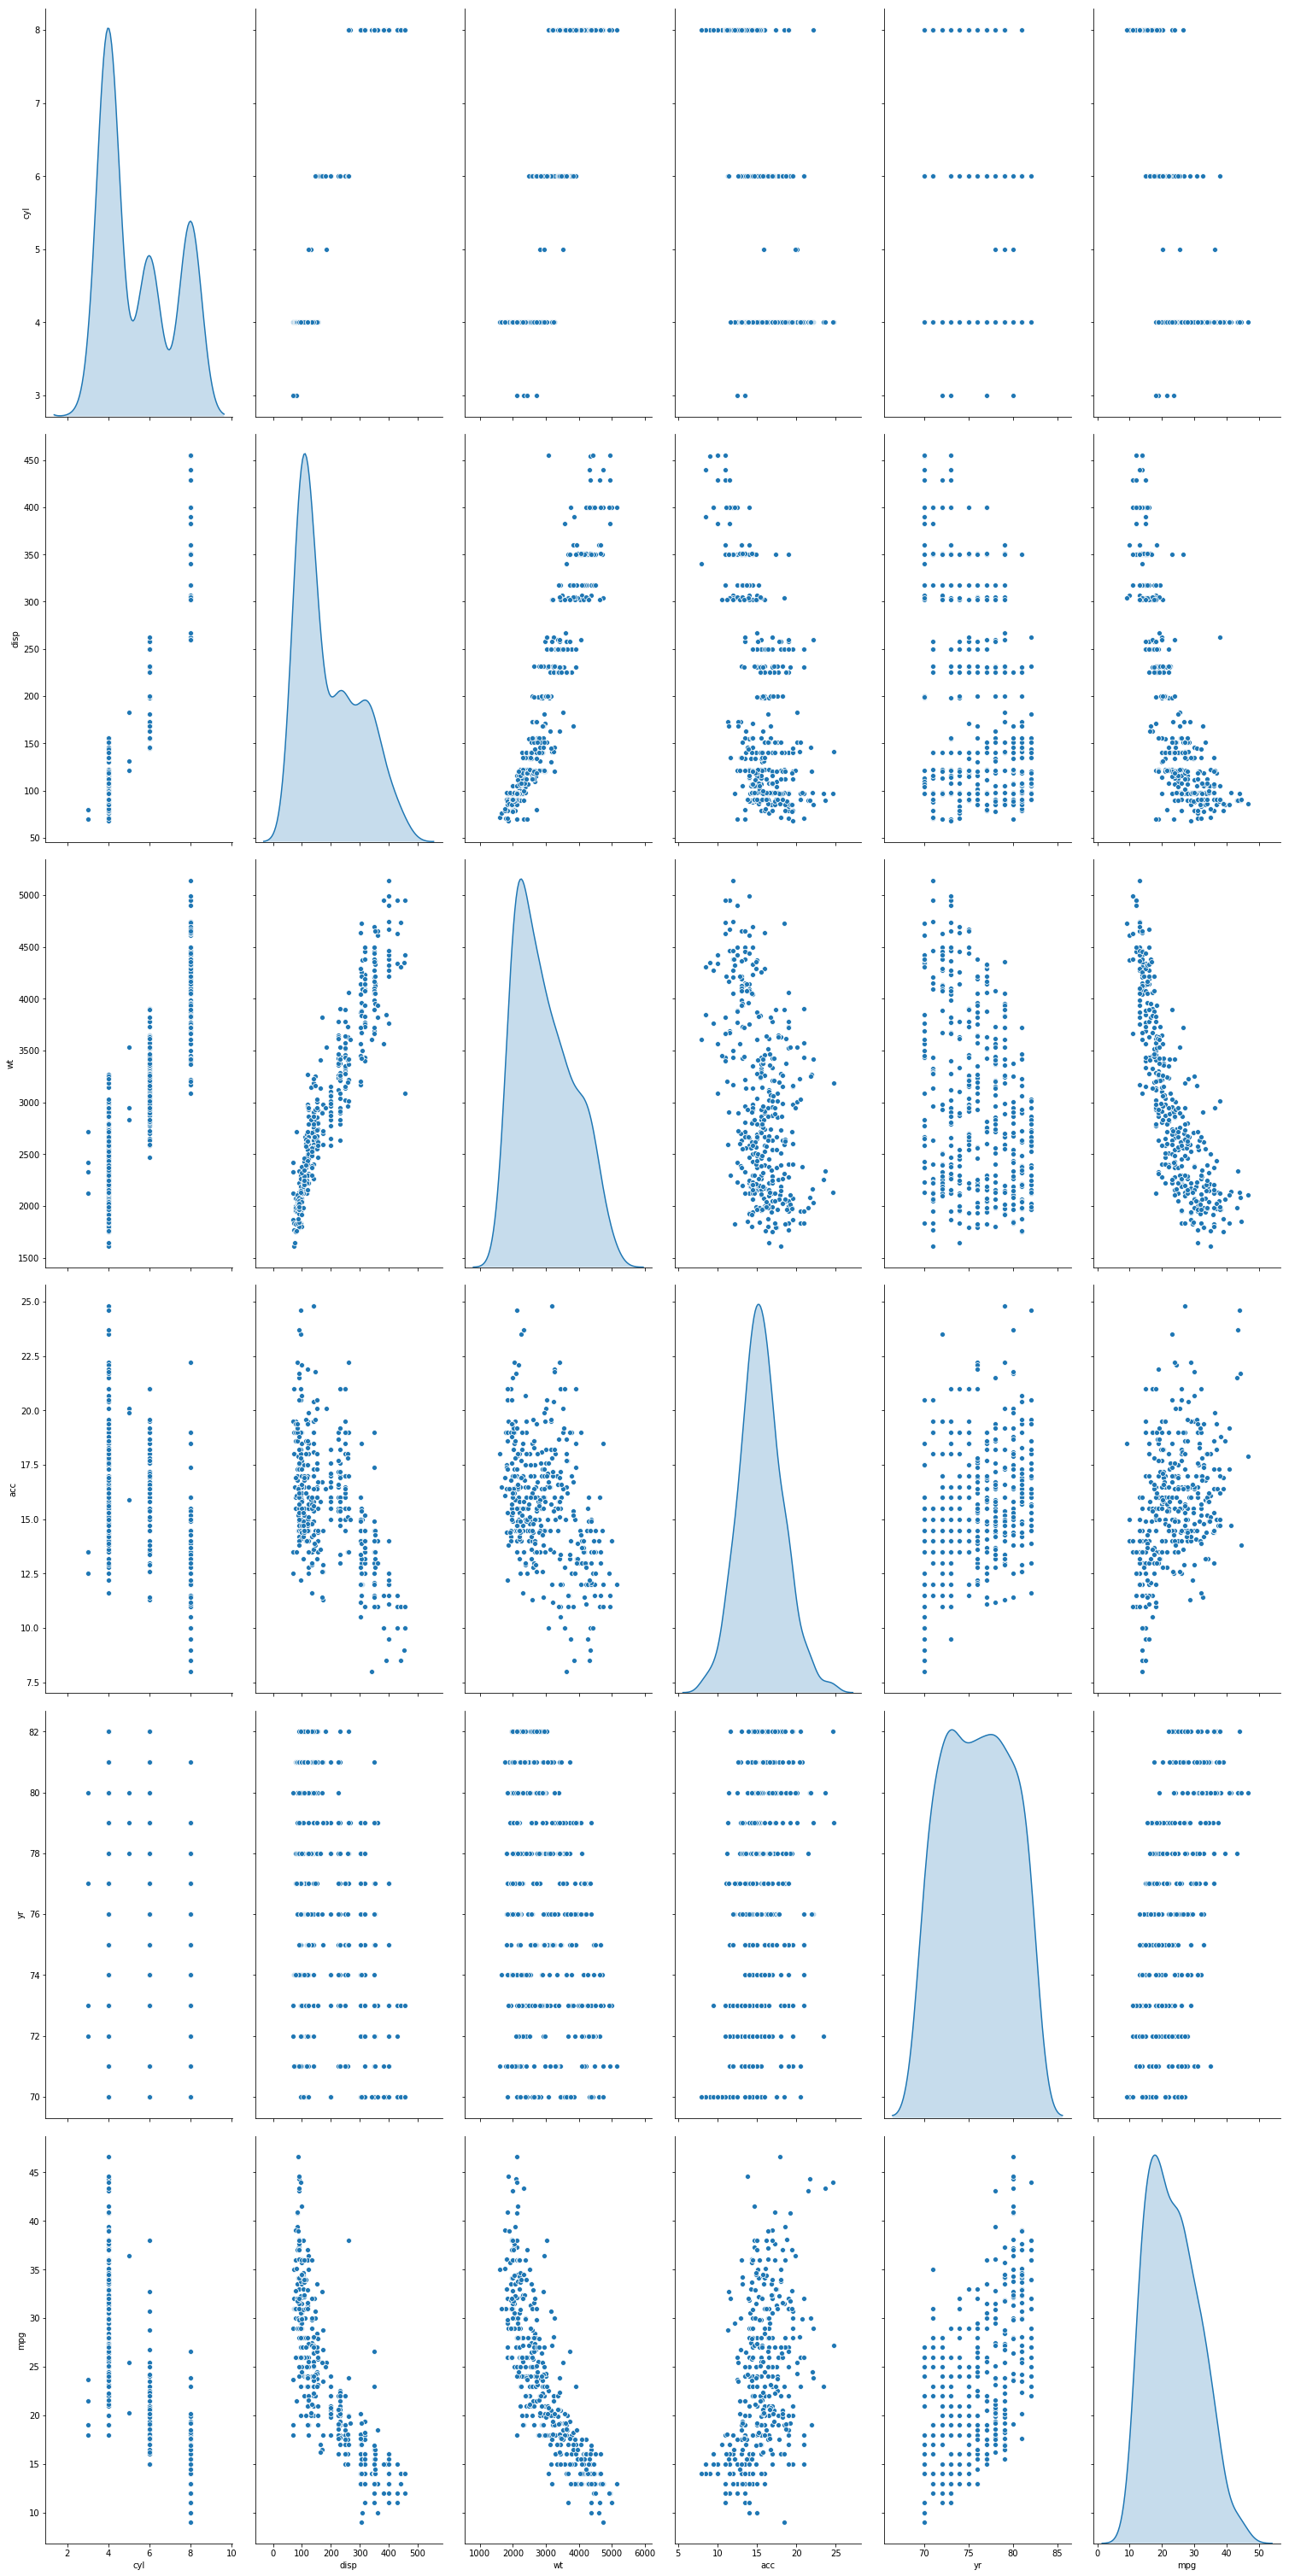

In [11]:
sns.pairplot(df_numeric, size=7,aspect=0.5 , diag_kind='kde')

In [30]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
cyl     398 non-null int64
disp    398 non-null float64
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(3), int64(3)
memory usage: 18.7 KB


In [18]:
from scipy.stats import zscore

df_numeric_attr = df_numeric.loc[:, 'cyl':'mpg']
df_numeric_attr_z = df_numeric_attr.apply(zscore)


#df_numeric_attr_z.pop('origin')      # Remove "origin" and "yr" columns
#df_numeric_attr_z.pop('yr')

array = df_numeric_attr_z.values

In [19]:
cluster_range = range( 2, 6)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df_numeric_attr)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,7.399322e+07
1,3,3.402713e+07
2,4,1.888864e+07
3,5,1.361541e+07


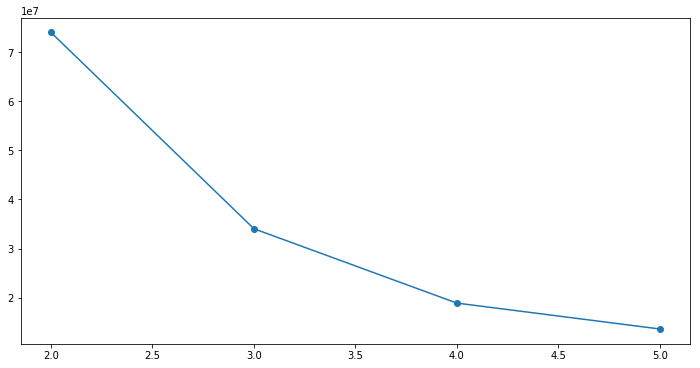

In [20]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:
# numer of clusters taking it as 3

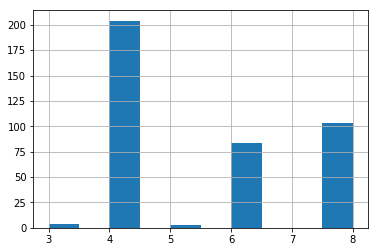

In [31]:
df_numeric['cyl'].hist()

In [32]:
#Splitting the data in to features and target, Variables X and y
X=df_numeric.drop(['cyl'],axis=1)
y=df_numeric['cyl']
print(X)

      disp    wt   acc  yr   mpg
0    307.0  3504  12.0  70  18.0
1    350.0  3693  11.5  70  15.0
2    318.0  3436  11.0  70  18.0
3    304.0  3433  12.0  70  16.0
4    302.0  3449  10.5  70  17.0
5    429.0  4341  10.0  70  15.0
6    454.0  4354   9.0  70  14.0
7    440.0  4312   8.5  70  14.0
8    455.0  4425  10.0  70  14.0
9    390.0  3850   8.5  70  15.0
10   383.0  3563  10.0  70  15.0
11   340.0  3609   8.0  70  14.0
12   400.0  3761   9.5  70  15.0
13   455.0  3086  10.0  70  14.0
14   113.0  2372  15.0  70  24.0
15   198.0  2833  15.5  70  22.0
16   199.0  2774  15.5  70  18.0
17   200.0  2587  16.0  70  21.0
18    97.0  2130  14.5  70  27.0
19    97.0  1835  20.5  70  26.0
20   110.0  2672  17.5  70  25.0
21   107.0  2430  14.5  70  24.0
22   104.0  2375  17.5  70  25.0
23   121.0  2234  12.5  70  26.0
24   199.0  2648  15.0  70  21.0
25   360.0  4615  14.0  70  10.0
26   307.0  4376  15.0  70  10.0
27   318.0  4382  13.5  70  11.0
28   304.0  4732  18.5  70   9.0
29    97.0

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
from sklearn.linear_model import LinearRegression
#create an instance and fit the model 
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df['Coefficient'].sort_values()

mpg    -0.003910
wt      0.000050
yr      0.001837
acc     0.006767
disp    0.015274
Name: Coefficient, dtype: float64